In [7]:
%pip install -U diffusers transformers torch torchvision torchaudio accelerate urllib3 jupyter ipywidgets tqdm peft

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 411 kB 1.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
from diffusers import DiffusionPipeline

/Users/ula/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
import torch

if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not built with MPS enabled.")
    else:
        print("MPS not available because the current macOS version is not 12.3+ and/or you do not have an M1/M2/M3 chip.")
else:
    print("MPS is available")

MPS is available


In [4]:
# Move the pipeline to the MPS device
pipe = pipe.to("mps")

# Recommended for MacBooks with less than 64GB RAM to reduce memory pressure
# and prevent swapping, especially for higher resolutions.
# pipe.enable_attention_slicing()

In [5]:
pipe.load_lora_weights("nerijs/pixel-art-xl")

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


In [6]:
prompt = "pixel art, a cute corgi, simple, flat colors"
prompt = "pixel art, a cute disco pug with neon light, simple, flat colors"

In [13]:
prompt = "pixel art, cyberpunk hacker women working intensely on a computer in a dimly lit room at night, neons, simple, flat colors"

In [7]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

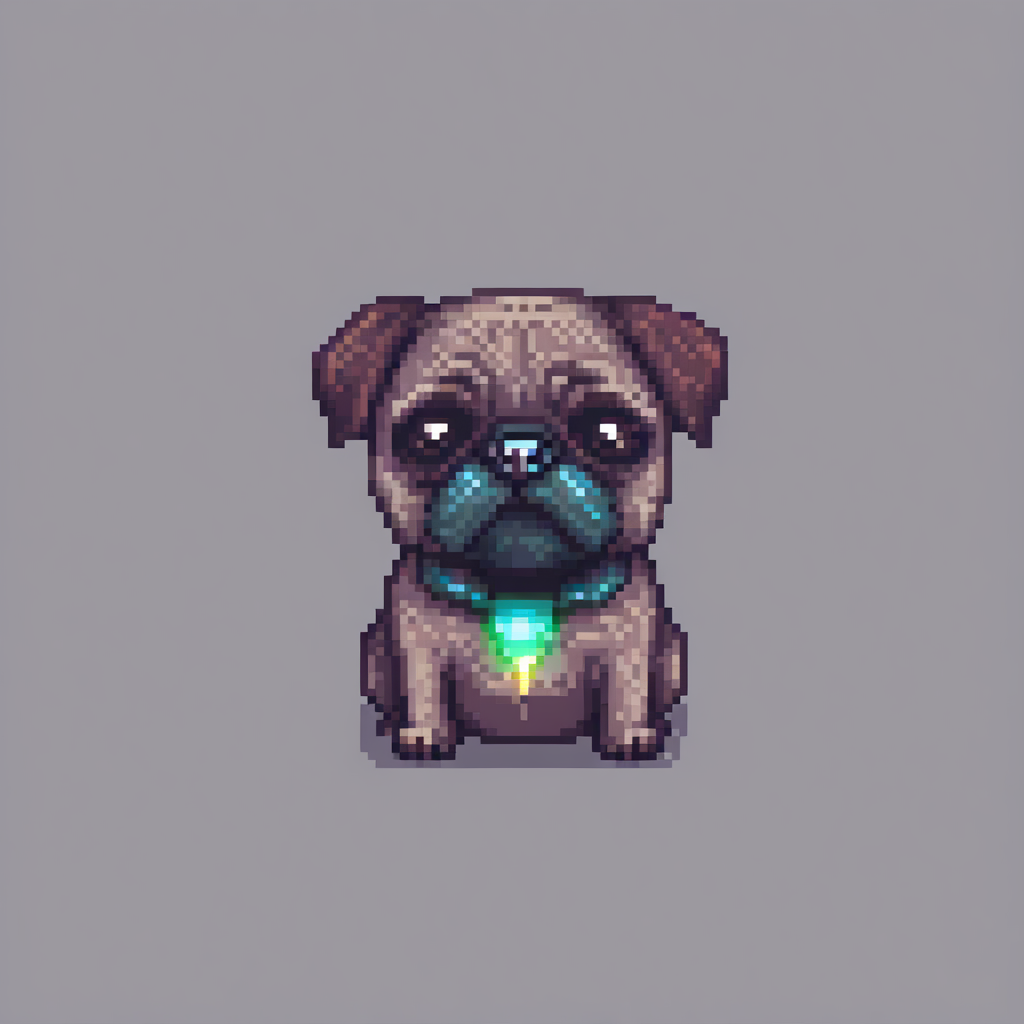

In [8]:
image